In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)
pd.set_option("display.max_rows", None)

In [4]:
df = pd.read_csv('Leads.csv')
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [5]:
df.shape

(9240, 37)

## AUTO-EDA

In [6]:
!pip install sweetviz

In [7]:
import sweetviz as sv
sweet_report = sv.analyze(df)
sweet_report.show_html('sweet_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


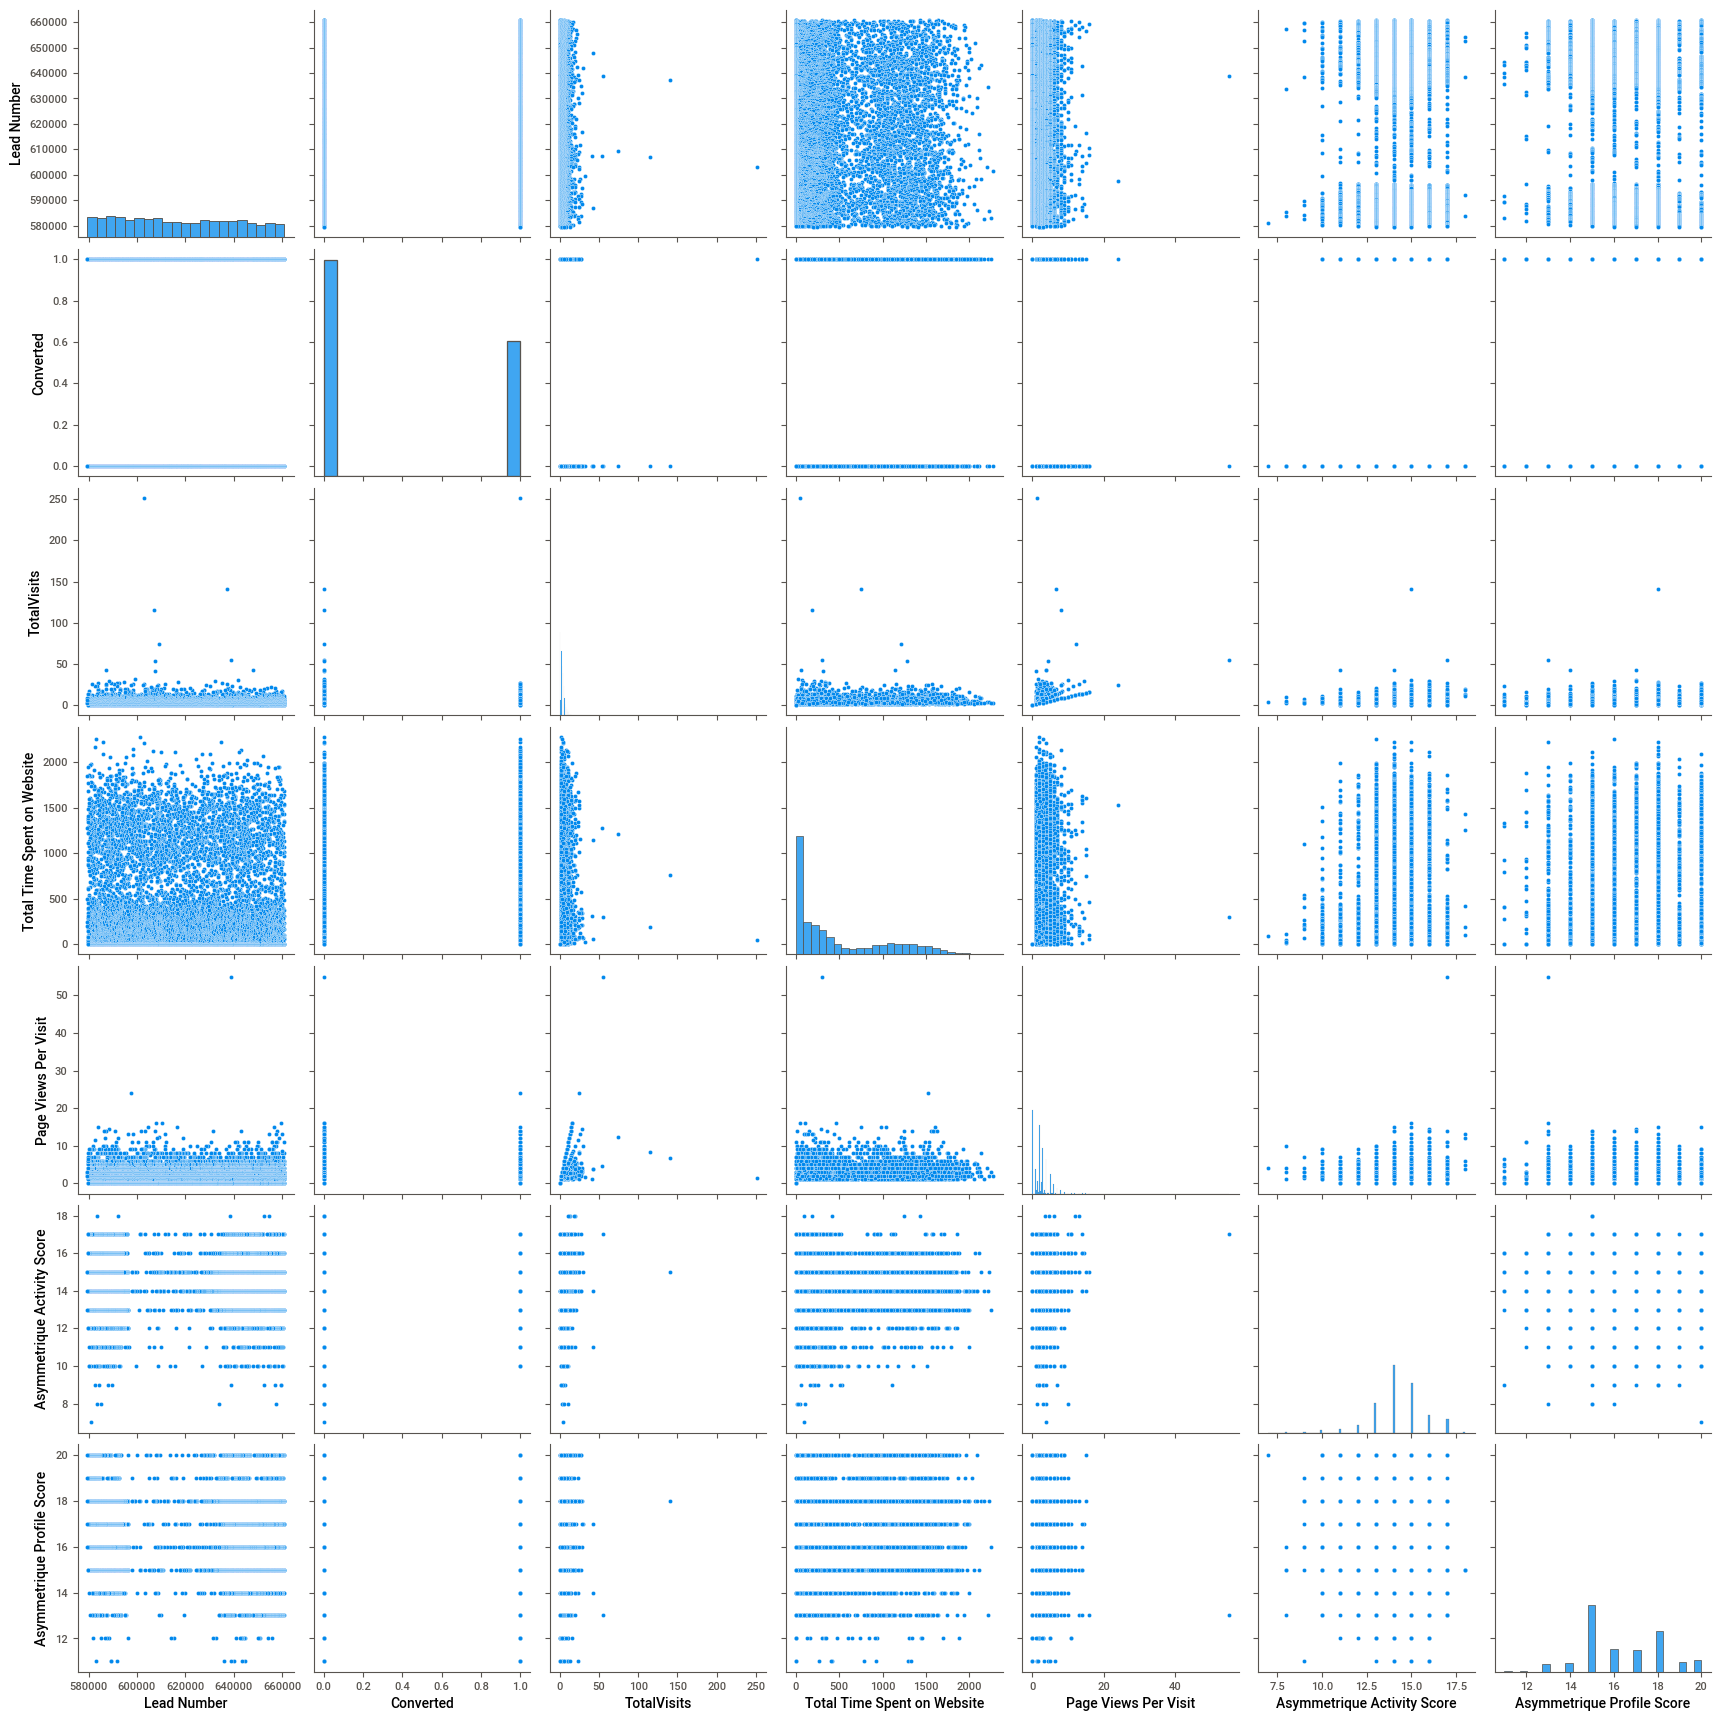

In [8]:
sns.pairplot(df)
plt.show()

In [9]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

# DATA CLEANING AND PREPARATION

In [10]:
df.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

it shows that there are a lot of columns which have high number of missing values. These columns are not useful. Since, there are 9240 datapoints in our dataframe, We should eliminate the columns having >=3000 missing values as they are of not significant to it.

LET"S REMOVE THE COLUMN WHIC HAVE >=3000 MISSING VALUES.

In [11]:
for c in df.columns:
    if df[c].isnull().sum()>=3000:
        df.drop(c,axis=1,inplace=True)

In [12]:
df.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

CHECKING THE VALUE COUNTS OF CITY COLOM

In [13]:
df['City'].value_counts(dropna=False).sort_values(ascending=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

AS IT MIGHT NOT BE USEFUL COLOM 'CITY' SO WE HAVE TO DROP IT FROM OUR DATASET.

In [14]:
df.drop(['City'], axis=1, inplace=True)

CHECKING THE COUNTS FOR THE COUNTRY COLOM

In [15]:
df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [16]:
df.drop(['Country'],axis=1,inplace=True)

In [17]:
df.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
X Education Forums                                  0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                 

In [18]:
df.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

In [19]:
df.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
What is your current occupation                  2690
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
X Education Forums                                  0
A free copy of Mastering The Interview              0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                                         0
Newspaper Article                                   0
Magazine                    

In [20]:
x_edu = df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedx_edu = pd.DataFrame(pt.fit_transform(x_edu))
transformedx_edu.columns = x_edu.columns
transformedx_edu.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  Converted
0    -1.457907                    -1.473767             -1.454706  -0.791863
1     0.747918                     0.729628              0.308534  -0.791863
2    -0.141636                     1.306093              0.065574   1.262845
3    -0.640428                     0.264936             -0.536967  -0.791863
4    -0.141636                     1.252499             -0.536967   1.262845

In [21]:
df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [22]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [23]:
df.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [24]:
df.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

LET'S ONLY DROP THE MISSING VALUES OF 'WHAT IS YOUR OCCUPATION' COLOM

In [25]:
# Dropping the null values rows in the column 'What is your current occupation'
df = df[~pd.isnull(df['What is your current occupation'])]

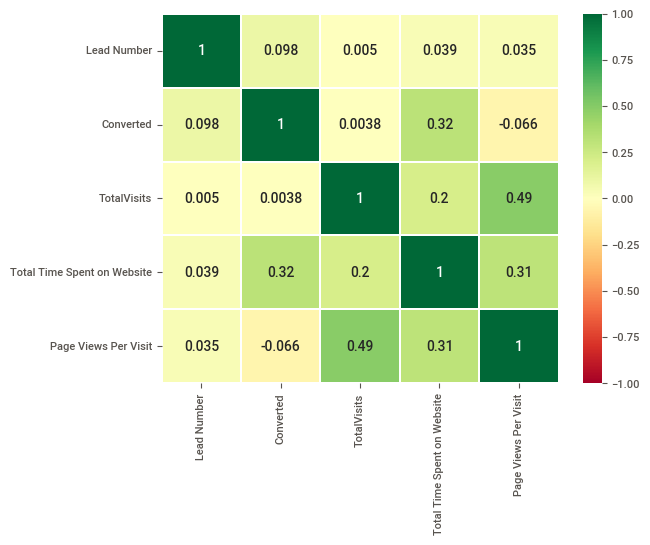

In [26]:
sns.heatmap(df.corr(), annot=True,cmap="RdYlGn", robust=True,linewidth=0.1, vmin=-1 )
plt.show()

In [27]:
df.isnull().sum().sort_values(ascending=False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [28]:
df = df[-pd.isnull(df['TotalVisits'])]
df = df[-pd.isnull(df['Page Views Per Visit'])]
df = df[-pd.isnull(df['Lead Source'])]
df = df[-pd.isnull(df['Last Activity'])]
df = df[-pd.isnull(df['Specialization'])]

In [29]:
df.isnull().sum().sort_index(ascending=False)

What is your current occupation           0
TotalVisits                               0
Total Time Spent on Website               0
Specialization                            0
Prospect ID                               0
Page Views Per Visit                      0
Lead Source                               0
Lead Origin                               0
Lead Number                               0
Last Notable Activity                     0
Last Activity                             0
Do Not Email                              0
Converted                                 0
A free copy of Mastering The Interview    0
dtype: int64

NOW OUR DATA IS CLEAN AND NO NULL VALUES ARE THERE

In [30]:
len(df.index)

6373

In [31]:
100*len(df.index)/9240

68.97186147186147

NOW WE HAVE 69% OF ROWS WHICH ARE CLEAN FOR PROCESSING

In [32]:
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email  Converted  TotalVisits  \
0      Olark Chat           No          0          0.0   
1  Organic Search           No          0          5.0   
2  Direct Traffic           No          1          2.0   
3  Direct Traffic           No          0          1.0   
4          Google           No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0                   Select                      Unemployed   
1                   Select                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                   Select                      Unemployed   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [33]:
df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [34]:
df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [35]:
df.shape

(6373, 12)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   obje

In [37]:
df.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  6373.000000  6373.000000                  6373.000000   
mean      0.480935     3.624196                   535.224541   
std       0.499676     5.048555                   565.374753   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    34.000000   
50%       0.000000     3.000000                   287.000000   
75%       1.000000     5.000000                  1022.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           6373.000000  
mean               2.480464  
std                2.167364  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.500000  
max               55.000000

## DUMMY VARIABLE CREATION

In [38]:
temp = df.loc[:, df.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [39]:
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

In [40]:
df = pd.concat([df,dummy], axis=1)
df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  Lead Origin_Landing Page Submission  \
0              Modified                                    0   
1          Email Opened                                    0   
2          Email Opened                                    1   
3              Modified                                    1   
4              Modified                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                      0                       1                           0   
1                      0                       0                           1   
2                      0                       0                           0   
3                      0                       0                           0   
4                      0                       0                           0   

   Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_

In [41]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' 
# which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(df['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
df = pd.concat([df, dummy_spl], axis = 1)

In [42]:
df.shape

(6373, 83)

In [43]:
# Dropping the variables for which the dummy variables have been created
df = df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [44]:
df.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_Olark Chat  \
0                   0                      0                       1   
1                   0                      0                       0   
2                   0                      0                       0   
3                   0                      0                       0   
4                   1                      0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_testone  \
0                             0                 0                    0   
1                             0                 0                    0   
2                             0                 0                    0   
3                             0                 0                    0   
4                             0                 0                    0   

   Do Not Email_Yes  Last Activity_Converted to Lead  \
0                 0                                0   
1                 0                                0   
2                 0                                0   
3                 0                                0   
4                 0                                1   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2         

# TRAIN-TEST SPLIT

In [45]:
import sklearn

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics

from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix

from sklearn.preprocessing import LabelEncoder

In [46]:
X = df.drop(['Converted'],1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_Olark Chat  \
0                   0                      0                       1   
1                   0                      0                       0   
2                   0                      0                       0   
3                   0                      0                       0   
4                   1                      0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_testone  \
0                             0                 0                    0   
1                             0                 0                    0   
2                             0                 0                    0   
3                             0                 0                    0   
4                             0                 0                    0   

   Do Not Email_Yes  Last Activity_Converted to Lead  \
0                 0                                0   
1                 0                                0   
2                 0                                0   
3                 0                                0   
4                 0                                1   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3       

In [47]:
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [49]:
print(X.shape)
print(y.shape)

(6373, 74)
(6373,)


# SCALING

In [50]:
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
8003     0.015936                     0.029489                 0.125   
218      0.015936                     0.082306                 0.250   
4171     0.023904                     0.034331                 0.375   
4037     0.000000                     0.000000                 0.000   
3660     0.000000                     0.000000                 0.000   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
8003                                    1                          0   
218                                     1                          0   
4171                                    1                          0   
4037                                    0                          0   
3660                                    0                          1   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
8003                        0                           1   
218                         0                           1   
4171                        0                           1   
4037                        0                           0   
3660                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
8003                     0                   0                      0   
218                      0                   0                      0   
4171                     0                   0                      0   
4037                     0                   0                      0   
3660                     0                   0                      0   

      Lead Source_Olark Chat  Lead Source_Organic Search  \
8003                       0                           0   
218                        0                           0   
4171                       0                           0   
4037                       1                           0   
3660                       0                           0   

      Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
8003                              0                          0   
218                               0                          0   
4171                              0                          0   
4037                              0                          0   
3660                              0                          0   

      Lead Source_Reference  Lead Source_Referral Sites  \
8003                      0                           0   
218                       0                           0   
4171                      0                           0   
4037                      0                           0   
3660                      1                           0   

      Lead Source_Social Media  Lead Source_WeLearn  \
8003                         0                    0   
218                          0                    0   
4171                         0                    0   
4037                         0                    0   
3660                         0                    0   

      Lead Source_Welingak Website  Lead Source_bing  Lead Source_testone  \
8003                             0                 0                    0   
218                              0                 0                    0   
4171                             0                 0                    0   
4037                             0                 0                    0   
3660                             0                 0                    0   

      Do Not Email_Yes  Last Activity_Converted to Lead  \
8003                 0                                0   
218                  0                                0   
4171                 0                                0   
4037                 0                                0   
3660                 0                                0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
8

# STEP 2 : MODEL BUILDING

In [51]:
logreg = LogisticRegression()

In [52]:
rfe = RFE(estimator=logreg, n_features_to_select=15) # running RFE with 15 vars
rfe

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [53]:
rfe = rfe.fit(X_train,y_train)
rfe

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [54]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_testone', False, 38),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 25),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link C

In [55]:
# Putting all the columns selected by RFE in the variable 'col'


col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [56]:
X_train = X_train[col]
X_train

TotalVisits  Total Time Spent on Website  Lead Origin_Lead Add Form  \
8003     0.015936                     0.029489                          0   
218      0.015936                     0.082306                          0   
4171     0.023904                     0.034331                          0   
4037     0.000000                     0.000000                          0   
3660     0.000000                     0.000000                          1   
207      0.019920                     0.157570                          0   
2044     0.007968                     0.163292                          0   
6411     0.019920                     0.566901                          0   
6498     0.007968                     0.242077                          0   
2085     0.000000                     0.000000                          1   
6260     0.000000                     0.000000                          0   
19       0.011952                     0.043134                          0   
7288     0.000000                     0.000000                          0   
7994     0.007968                     0.194542                          0   
9217     0.000000                     0.000000                          0   
8597     0.031873                     0.590669                          0   
9044     0.027888                     0.670775                          0   
983      0.000000                     0.000000                          1   
4212     0.031873                     0.500880                          0   
1267     0.007968                     0.659771                          0   
7479     0.027888                     0.008803                          0   
8927     0.007968                     0.382923                          0   
2900     0.019920                     0.042254                          0   
2628     0.019920                     0.030810                          0   
5188     0.003984                     0.184419                          0   
6497     0.000000                     0.000000                          0   
2686     0.000000                     0.000000                          1   
175      0.003984                     0.110035                          0   
2443     0.000000                     0.000000                          1   
3985     0.011952                     0.055898                          0   
2028     0.000000                     0.000000                          0   
6592     0.011952                     0.237676                          0   
7632     0.003984                     0.153169                          0   
3155     0.007968                     0.656250                          0   
4277     0.003984                     0.134243                          0   
3207     0.015936                     0.735035                          0   
8241     0.011952                     0.079665                          0   
5152     0.003984                     0.150968                          0   
6111     0.015936                     0.114877                          0   
4359     0.000000                     0.000000                          1   
772      0.015936                     0.014965                          0   
8409     0.007968                     0.684859                          0   
1940     0.007968                     0.207306                          0   
4641     0.007968                     0.048856                          0   
4049     0.000000                     0.000000                          1   
4636     0.007968                     0.099032                          0   
3818     0.007968                     0.060739                          0   
5460     0.015936                     0.605194                          0   
4544     0.055777                     0.075264                          0   
1753     0.000000                     0.000000                          1   
4120     0.011952                     0.092430                          0   
23

Now we have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, we have to use these variables to create a logistic regression model using statsmodels.

## MODEL-1

In [57]:
# import stats library
from scipy import stats
import statsmodels.api as sm

In [58]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Sun, 17 Dec 2023   Deviance:                       4145.5
Time:                        16:55:36   Pearson chi2:                 4.84e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3660
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

## CHECKING VIF

In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                              Lead Origin_Lead Add Form  84.19
4                                  Lead Source_Reference  65.18
5                           Lead Source_Welingak Website  20.03
11            What is your current occupation_Unemployed   3.65
7                 Last Activity_Had a Phone Conversation   2.44
13        Last Notable Activity_Had a Phone Conversation   2.43
1                            Total Time Spent on Website   2.38
0                                            TotalVisits   1.62
8                                 Last Activity_SMS Sent   1.59
12  What is your current occupation_Working Professional   1.56
3                                 Lead Source_Olark Chat   1.44
6                                       Do Not Email_Yes   1.09
10               What is your current occupation_Student   1.09
9              What is your current occupation_Housewife   1.01
14                     Last Notable Activity_Unreachable   1.01

## MODEL-2

In [60]:
X_train.drop('Lead Origin_Lead Add Form', axis = 1, inplace = True)

In [61]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.5
Date:                Sun, 17 Dec 2023   Deviance:                       4152.9
Time:                        16:55:36   Pearson chi2:                 4.84e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3649
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9896      0.599     -1.651      0.099      -2.164       0.185
TotalVisits                                             11.0456      2.657      4.157      0.000       5.838      16.253
Total Time Spent on Website                              4.4091      0.185     23.882      0.000       4.047       4.771
Lead Source_Olark Chat                                   1.4434      0.121     11.885      0.000       1.205       1.681
Lead Source_Reference                                    4.2314      0.264     16.018      0.000       3.714       4.749
Lead Source_Welingak Website                             6.3476      1.012      6.275      0.000       4.365       8.330
Do Not Email_Yes                                        -1.5073      0.193     -7.802      0.000      -1.886      -1.129
Last Activity_Had a Phone Conversation                   1.0369      0.982      1.056      0.291      -0.888       2.962
Last Activity_SMS Sent                                   1.1841      0.082     14.391      0.000       1.023       1.345
What is your current occupation_Housewife               22.6415   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1578      0.630     -1.838      0.066      -2.393       0.077
What is your current occupation_Unemployed              -1.3394      0.594     -2.255      0.024      -2.504      -0.175
What is your current occupation_Working Professional     1.2692      0.623      2.038      0.042       0.048       2.490
Last Notable Activity_Had a Phone Conversation          23.1922   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7793      0.807      3.445      0.001       1.198       4.360
========================================================================================================================
"""

## CHECKING VIF

In [62]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10            What is your current occupation_Unemployed  3.65
6                 Last Activity_Had a Phone Conversation  2.44
12        Last Notable Activity_Had a Phone Conversation  2.43
1                            Total Time Spent on Website  2.38
0                                            TotalVisits  1.62
7                                 Last Activity_SMS Sent  1.59
11  What is your current occupation_Working Professional  1.56
2                                 Lead Source_Olark Chat  1.44
3                                  Lead Source_Reference  1.32
5                                       Do Not Email_Yes  1.09
9                What is your current occupation_Student  1.09
4                           Lead Source_Welingak Website  1.08
8              What is your current occupation_Housewife  1.01
13                     Last Notable Activity_Unreachable  1.01

## MODEL-3

In [63]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [64]:
logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.3
Date:                Sun, 17 Dec 2023   Deviance:                       4158.6
Time:                        16:55:36   Pearson chi2:                 4.84e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3641
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9909      0.599     -1.654      0.098      -2.165       0.183
TotalVisits                                             11.1568      2.661      4.192      0.000       5.941      16.373
Total Time Spent on Website                              4.4017      0.184     23.858      0.000       4.040       4.763
Lead Source_Olark Chat                                   1.4432      0.121     11.883      0.000       1.205       1.681
Lead Source_Reference                                    4.2312      0.264     16.017      0.000       3.713       4.749
Lead Source_Welingak Website                             6.3473      1.012      6.275      0.000       4.365       8.330
Do Not Email_Yes                                        -1.5074      0.193     -7.803      0.000      -1.886      -1.129
Last Activity_Had a Phone Conversation                   2.7458      0.801      3.426      0.001       1.175       4.317
Last Activity_SMS Sent                                   1.1839      0.082     14.394      0.000       1.023       1.345
What is your current occupation_Housewife               21.6429   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1561      0.630     -1.836      0.066      -2.391       0.078
What is your current occupation_Unemployed              -1.3378      0.594     -2.253      0.024      -2.502      -0.174
What is your current occupation_Working Professional     1.2686      0.623      2.037      0.042       0.048       2.489
Last Notable Activity_Unreachable                        2.7783      0.807      3.444      0.001       1.197       4.359
========================================================================================================================
"""

## CHECKING VIF

In [65]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10            What is your current occupation_Unemployed  3.65
1                            Total Time Spent on Website  2.38
0                                            TotalVisits  1.62
7                                 Last Activity_SMS Sent  1.59
11  What is your current occupation_Working Professional  1.56
2                                 Lead Source_Olark Chat  1.44
3                                  Lead Source_Reference  1.32
5                                       Do Not Email_Yes  1.09
9                What is your current occupation_Student  1.09
4                           Lead Source_Welingak Website  1.08
6                 Last Activity_Had a Phone Conversation  1.01
8              What is your current occupation_Housewife  1.01
12                     Last Notable Activity_Unreachable  1.01

## MODEL-4

In [66]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [67]:
logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2081.5
Date:                Sun, 17 Dec 2023   Deviance:                       4163.1
Time:                        16:55:37   Pearson chi2:                 4.85e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3635
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4394      0.553     -0.794      0.427      -1.524       0.645
TotalVisits                                             10.9643      2.647      4.142      0.000       5.776      16.152
Total Time Spent on Website                              4.3997      0.184     23.856      0.000       4.038       4.761
Lead Source_Olark Chat                                   1.4382      0.121     11.855      0.000       1.200       1.676
Lead Source_Reference                                    4.2288      0.264     16.015      0.000       3.711       4.746
Lead Source_Welingak Website                             6.3433      1.011      6.271      0.000       4.361       8.326
Do Not Email_Yes                                        -1.5100      0.193     -7.807      0.000      -1.889      -1.131
Last Activity_Had a Phone Conversation                   2.7470      0.801      3.428      0.001       1.176       4.318
Last Activity_SMS Sent                                   1.1836      0.082     14.391      0.000       1.022       1.345
What is your current occupation_Student                 -1.7032      0.588     -2.897      0.004      -2.856      -0.551
What is your current occupation_Unemployed              -1.8847      0.549     -3.431      0.001      -2.961      -0.808
What is your current occupation_Working Professional     0.7215      0.580      1.243      0.214      -0.416       1.859
Last Notable Activity_Unreachable                        2.7755      0.807      3.439      0.001       1.194       4.357
========================================================================================================================
"""

## CHECKING VIF

In [68]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9             What is your current occupation_Unemployed  3.64
1                            Total Time Spent on Website  2.37
0                                            TotalVisits  1.62
7                                 Last Activity_SMS Sent  1.59
10  What is your current occupation_Working Professional  1.56
2                                 Lead Source_Olark Chat  1.44
3                                  Lead Source_Reference  1.32
5                                       Do Not Email_Yes  1.09
8                What is your current occupation_Student  1.09
4                           Lead Source_Welingak Website  1.08
6                 Last Activity_Had a Phone Conversation  1.01
11                     Last Notable Activity_Unreachable  1.01

# STEP 3 : MODEL EVALUTION

In [69]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train_sm))
y_train_pred[:10]

8003    0.299132
218     0.141834
4171    0.127602
4037    0.291679
3660    0.956262
207     0.194437
2044    0.177750
6411    0.952857
6498    0.075665
2085    0.982340
dtype: float64

In [70]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.29913183, 0.14183438, 0.12760155, 0.29167908, 0.95626237,
       0.19443676, 0.17775018, 0.95285672, 0.07566484, 0.98233985])

Creating a new dataframe containing the actual conversion flag and the probabilities predicted by the model

In [71]:


y_train_pred_final = pd.DataFrame({'Converted(ACTUAL)':y_train.values, 'Conversion_Probability(PREDICTED)':y_train_pred})
y_train_pred_final.head()

Converted(ACTUAL)  Conversion_Probability(PREDICTED)
0                  0                           0.299132
1                  0                           0.141834
2                  1                           0.127602
3                  1                           0.291679
4                  1                           0.956262

 Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [72]:
y_train_pred_final['Predicted'] = y_train_pred_final['Conversion_Probability(PREDICTED)'].map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted(ACTUAL)  Conversion_Probability(PREDICTED)  Predicted
0                  0                           0.299132          0
1                  0                           0.141834          0
2                  1                           0.127602          0
3                  1                           0.291679          0
4                  1                           0.956262          1

### NOW WE CAN CREATE CONFUSION MATRIX

In [73]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted(ACTUAL)'], y_train_pred_final['Predicted'])
print(confusion)

[[1932  380]
 [ 562 1587]]


In [74]:
metrics.accuracy_score(y_train_pred_final['Converted(ACTUAL)'], y_train_pred_final['Predicted'])

0.788836583725622

In [75]:
#OTHER PARAMS

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [76]:
print(TP,TN,FP,FN)

1587 1932 380 562


In [77]:
print('SENSITIVITY')
TP/(TP+FN)

SENSITIVITY


0.7384830153559795

In [78]:
print('SPECIFICITY')
TN/(TN + FP)

SPECIFICITY


0.8356401384083045

### Finding the Optimal Cutoff
Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [79]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [80]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final['Converted(ACTUAL)'],
                    y_train_pred_final['Conversion_Probability(PREDICTED)'], 
                                         drop_intermediate=False)

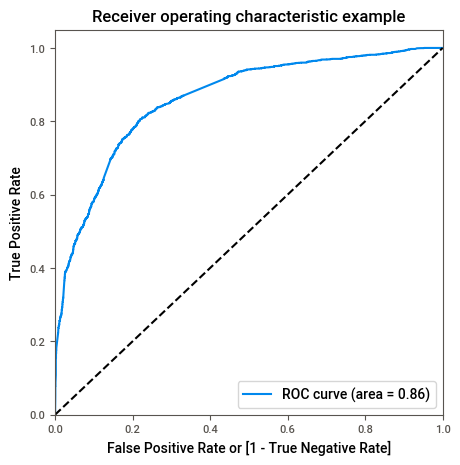

In [81]:
# Calling the ROC function

draw_roc(y_train_pred_final['Converted(ACTUAL)'], y_train_pred_final['Conversion_Probability(PREDICTED)'])

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [82]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Conversion_Probability(PREDICTED)'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted(ACTUAL)  Conversion_Probability(PREDICTED)  Predicted  0.0  0.1  \
0                  0                           0.299132          0    1    1   
1                  0                           0.141834          0    1    1   
2                  1                           0.127602          0    1    1   
3                  1                           0.291679          0    1    1   
4                  1                           0.956262          1    1    1   

   0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  
0    1    0    0    0    0    0    0    0  
1    0    0    0    0    0    0    0    0  
2    0    0    0    0    0    0    0    0  
3    1    0    0    0    0    0    0    0  
4    1    1    1    1    1    1    1    1

In [83]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['PROBABILITY','ACCURACY','SENSITIVITY','SPECIFICITY'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted(ACTUAL)'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     PROBABILITY  ACCURACY  SENSITIVITY  SPECIFICITY
0.0          0.0  0.481731     1.000000     0.000000
0.1          0.1  0.527460     0.994416     0.093426
0.2          0.2  0.698274     0.944160     0.469723
0.3          0.3  0.767317     0.865054     0.676471
0.4          0.4  0.791975     0.809214     0.775952
0.5          0.5  0.788837     0.738483     0.835640
0.6          0.6  0.757229     0.622615     0.882353
0.7          0.7  0.735485     0.542113     0.915225
0.8          0.8  0.712620     0.454165     0.952855
0.9          0.9  0.646492     0.284318     0.983131


<Figure size 500x400 with 0 Axes>

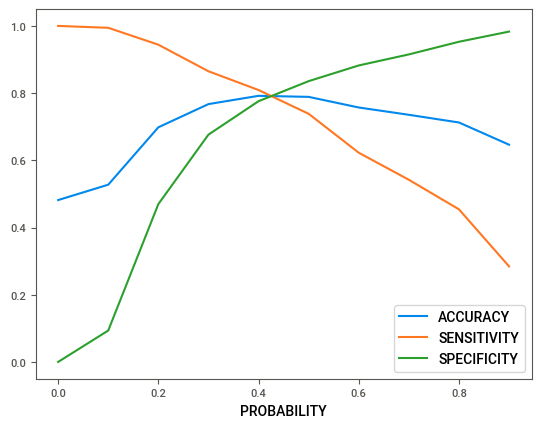

In [84]:
plt.figure(figsize=(5,4))
cutoff_df.plot.line(x='PROBABILITY', y=['ACCURACY','SENSITIVITY','SPECIFICITY'])
plt.show()

As you can see that around `0.42`, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

# STEP 4 : MAKING PREDICTIONS ON TEST SET

In [85]:
# Scaling the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] =  scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [86]:
# Selecting the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

TotalVisits  Total Time Spent on Website  Lead Origin_Lead Add Form  \
4771     0.000000                     0.000000                          1   
6122     0.027888                     0.029049                          0   
9202     0.015936                     0.416813                          0   
6570     0.011952                     0.378961                          0   
2668     0.031873                     0.395246                          0   

      Lead Source_Olark Chat  Lead Source_Reference  \
4771                       0                      1   
6122                       0                      0   
9202                       0                      0   
6570                       0                      0   
2668                       0                      0   

      Lead Source_Welingak Website  Do Not Email_Yes  \
4771                             0                 0   
6122                             0                 0   
9202                             0                 0   
6570                             0                 1   
2668                             0                 0   

      Last Activity_Had a Phone Conversation  Last Activity_SMS Sent  \
4771                                       0                       1   
6122                                       0                       0   
9202                                       0                       1   
6570                                       0                       1   
2668                                       0                       1   

      What is your current occupation_Housewife  \
4771                                          0   
6122                                          0   
9202                                          0   
6570                                          0   
2668                                          0   

      What is your current occupation_Student  \
4771                                        0   
6122                                        0   
9202                                        0   
6570                                        0   
2668                                        0   

      What is your current occupation_Unemployed  \
4771                                           0   
6122                                           1   
9202                                           1   
6570                                           1   
2668                                           1   

      What is your current occupation_Working Professional  \
4771                                                     1   
6122                                                     0   
9202                                                     0   
6570                                                     0   
2668                                                     0   

      Last Notable Activity_Had a Phone Conversation  \
4771                                               0   
6122                                               0   
9202                                               0   
6570                                               0   
2668                                               0   

      Last Notable Activity_Unreachable  
4771                                  0  
6122                                  0  
9202                                  0  
6570                                  0  
2668                                  0

In [87]:
# Adding a constant to X_test

X_test_sm = sm.add_constant(X_test[col])
X_test_sm

const  TotalVisits  Total Time Spent on Website  \
4771    1.0     0.000000                     0.000000   
6122    1.0     0.027888                     0.029049   
9202    1.0     0.015936                     0.416813   
6570    1.0     0.011952                     0.378961   
2668    1.0     0.031873                     0.395246   
4233    1.0     0.000000                     0.000000   
3368    1.0     0.007968                     0.705106   
9091    1.0     0.035857                     0.406690   
5972    1.0     0.007968                     0.030810   
3631    1.0     0.019920                     0.505722   
6884    1.0     0.000000                     0.000000   
4362    1.0     0.007968                     0.102113   
7718    1.0     0.023904                     0.140845   
3715    1.0     0.015936                     0.464349   
4198    1.0     0.011952                     0.367518   
7790    1.0     0.003984                     0.183979   
2424    1.0     0.015936                     0.345951   
1899    1.0     0.023904                     0.805458   
8209    1.0     0.007968                     0.066461   
182     1.0     0.015936                     0.397887   
2010    1.0     0.027888                     0.381162   
731     1.0     0.007968                     0.149648   
1872    1.0     0.000000                     0.000000   
8987    1.0     0.011952                     0.574824   
3083    1.0     0.011952                     0.292254   
8205    1.0     0.000000                     0.000000   
5370    1.0     0.007968                     0.075264   
7386    1.0     0.000000                     0.000000   
1925    1.0     0.019920                     0.381162   
1965    1.0     0.000000                     0.000000   
1552    1.0     0.007968                     0.628961   
8442    1.0     0.000000                     0.000000   
7766    1.0     0.019920                     0.025968   
2798    1.0     0.000000                     0.000000   
999     1.0     0.023904                     0.812940   
8114    1.0     0.019920                     0.615757   
3193    1.0     0.039841                     0.095070   
2914    1.0     0.007968                     0.492518   
8174    1.0     0.000000                     0.000000   
1991    1.0     0.039841                     0.655370   
8497    1.0     0.007968                     0.092430   
6989    1.0     0.035857                     0.410211   
6175    1.0     0.015936                     0.828345   
5710    1.0     0.011952                     0.062500   
9162    1.0     0.027888                     0.667254   
5652    1.0     0.000000                     0.000000   
6948    1.0     0.003984                     0.031250   
1311    1.0     0.007968                     0.512764   
5998    1.0     0.043825                     0.314261   
2050    1.0     0.035857                     0.168134   
6144    1.0     0.015936                     0.401849   
9142    1.0     0.011952                     0.101673   
8567    1.0     0.000000                     0.000000   
7048    1.0     0.035857                     0.542694   
6459    1.0     0.011952                     0.106954   
288     1.0     0.015936                     0.013644   
8864    1.0     0.011952                     0.122359   
3814    1.0     0.011952                     0.595511   
8641    1.0     0.000000                     0.000000   
5814    1.0     0.007968                     0.096391   
4551    1.0     0.019920                     0.536972   
1886    1.0     0.011952                     0.466989   
1644    1.0     0.000000                     0.000000   
2131    1.0     0.000000                     0.000000   
6942    1.0     0.000000                     0.000000   
6655    1.0     0.019920                     0.073063   
6545    1.0     0.043825                     0.001320   
1602    1.0     0.015936                     0.001761   
3579    1.0     0.015936                     0.061620   
889     1.0     

In [88]:
# Dropping the required columns from X_test as well

X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 
                     'Last Notable Activity_Had a Phone Conversation'], 1, 
                                inplace = True)

In [89]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test_sm))
y_test_pred[:10]

4771    0.996661
6122    0.130047
9202    0.703675
6570    0.298726
2668    0.721130
4233    0.802832
3368    0.704579
9091    0.465862
5972    0.281714
3631    0.786511
dtype: float64

In [90]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1[:10]

0
4771  0.996661
6122  0.130047
9202  0.703675
6570  0.298726
2668  0.721130
4233  0.802832
3368  0.704579
9091  0.465862
5972  0.281714
3631  0.786511

In [91]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df[:10]

Converted
4771          1
6122          0
9202          0
6570          1
2668          1
4233          1
3368          0
9091          1
5972          0
3631          1

In [92]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [93]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

Converted         0
0          1  0.996661
1          0  0.130047
2          0  0.703675
3          1  0.298726
4          1  0.721130

In [94]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

Converted  Conversion_Prob
0          1         0.996661
1          0         0.130047
2          0         0.703675
3          1         0.298726
4          1         0.721130

In [95]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          1         0.996661                1
1          0         0.130047                0
2          0         0.703675                1
3          1         0.298726                0
4          1         0.721130                1

NOW WE CAN CALCULATE SOME CRITERIA

In [96]:
# Let's check the overall accuracy
print('ACCURACY')
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

ACCURACY


0.7850418410041841

In [97]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
print(confusion2)

[[787 209]
 [202 714]]


In [98]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [99]:
print(TP,TN,FP,FN)

714 787 209 202


In [100]:
print('SENSITIVITY')

TP / (TP + FN)

SENSITIVITY


0.7794759825327511

In [101]:
print('SPECIFICITY')

TN / (TN +FP)

SPECIFICITY


0.7901606425702812

### PRECESION-RECALL

In [102]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted(ACTUAL)'], y_train_pred_final.Predicted )
confusion

array([[1932,  380],
       [ 562, 1587]], dtype=int64)

In [103]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### PRECESION

In [104]:
print('PRECESION')

TP / (TP + FP)

PRECESION


0.7735644637053087

### RECALL

In [105]:
print('RECALL')

TP / (TP + FN)

RECALL


0.7794759825327511

### PRECESION AND RECALL TRADEOFF

In [106]:
y_train_pred_final['Converted(ACTUAL)'], y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
 5       0
 6       0
 7       1
 8       0
 9       1
 10      0
 11      0
 12      1
 13      1
 14      0
 15      1
 16      1
 17      1
 18      1
 19      1
 20      0
 21      0
 22      1
 23      0
 24      0
 25      0
 26      1
 27      0
 28      1
 29      0
 30      0
 31      0
 32      0
 33      0
 34      0
 35      1
 36      0
 37      0
 38      0
 39      1
 40      0
 41      1
 42      0
 43      0
 44      1
 45      0
 46      0
 47      1
 48      0
 49      1
 50      0
 51      0
 52      1
 53      1
 54      1
 55      0
 56      0
 57      0
 58      0
 59      0
 60      0
 61      0
 62      1
 63      0
 64      1
 65      0
 66      0
 67      0
 68      0
 69      0
 70      1
 71      1
 72      1
 73      0
 74      1
 75      0
 76      0
 77      0
 78      1
 79      1
 80      0
 81      0
 82      1
 83      0
 84      1
 85      1
 86      1
 87      1
 88      1
 89      1
 90      0

In [107]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted(ACTUAL)'], y_train_pred_final['Conversion_Probability(PREDICTED)'])

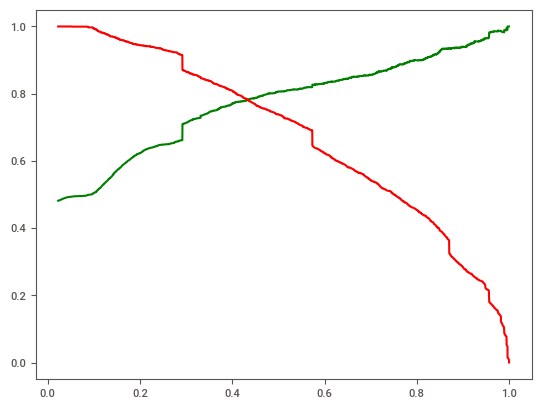

In [108]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# STEP 5 : MAKING PREDICTIONS

In [109]:
y_test_pred = res.predict(sm.add_constant(X_test_sm))
y_test_pred[:10]

4771    0.996661
6122    0.130047
9202    0.703675
6570    0.298726
2668    0.721130
4233    0.802832
3368    0.704579
9091    0.465862
5972    0.281714
3631    0.786511
dtype: float64

In [110]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1[:10]

0
4771  0.996661
6122  0.130047
9202  0.703675
6570  0.298726
2668  0.721130
4233  0.802832
3368  0.704579
9091  0.465862
5972  0.281714
3631  0.786511

In [111]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
4771          1
6122          0
9202          0
6570          1
2668          1

In [112]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

Converted         0
0          1  0.996661
1          0  0.130047
2          0  0.703675
3          1  0.298726
4          1  0.721130

In [113]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

Converted  Conversion_Prob
0          1         0.996661
1          0         0.130047
2          0         0.703675
3          1         0.298726
4          1         0.721130

In [114]:
# Making predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [115]:
y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          1         0.996661                1
1          0         0.130047                0
2          0         0.703675                1
3          1         0.298726                0
4          1         0.721130                1

## CHECKING CRITERIA

In [116]:
# Let's checking the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7871338912133892

In [117]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[802, 194],
       [213, 703]], dtype=int64)

In [118]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [119]:
print(TP, TN, FP, FN)

703 802 194 213


In [120]:
print('PRECESION')

TP / float(TP + FP)

PRECESION


0.7837235228539576

In [121]:
print('RECALL')

TP /float(TP + FN)

RECALL


0.767467248908297

In [122]:
print('SENSITIVITY')
TP/(TP+FN)

SENSITIVITY


0.767467248908297

In [123]:
print('SPECIFICITY')
TN/(TN + FP)

SPECIFICITY


0.8052208835341366